## Data visualisation of Forbes Highest Paid Athletes 1990-2020

Hemant Thapa

Date: 24/01/2023

### IMPORT LIBRARIES

In [1]:
#Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

### IMPORT DATASET

In [2]:
#Location of dataset
df = pd.read_csv('datasets/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df.shape

(301, 8)

#### DATA CLEANSING

In [3]:
df.tail()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5
300,301,Carson Wentz,USA,10,>100,American Football,2020,59.1


In [4]:
#Row and columns
df.shape

(301, 8)

In [5]:
#Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [6]:
#Checking columns
df.columns

Index(['S.NO', 'Name', 'Nationality', 'Current Rank', 'Previous Year Rank',
       'Sport', 'Year', 'earnings ($ million)'],
      dtype='object')

In [7]:
# Converting large into smaller case
df.columns = df.columns.str.lower()
df.columns

Index(['s.no', 'name', 'nationality', 'current rank', 'previous year rank',
       'sport', 'year', 'earnings ($ million)'],
      dtype='object')

In [8]:
#Rename columns name into snake_case
df.rename(columns={'s.no':'serial_number',
                   'current rank':'current_rank',
                   'previous year rank':'previous_year_rank',
                   'earnings ($ million)':'earnings_million_dollars'
                  }, inplace=True)

In [9]:
#inspecting all result
df.tail()

,serial_number,name,nationality,current_rank,previous_year_rank,sport,year,earnings_million_dollars
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5
300,301,Carson Wentz,USA,10,>100,American Football,2020,59.1


In [10]:
#None value contians only on 'previous_year_rank' column
df.columns[df.eq('none').any()].tolist()

['previous_year_rank']

In [11]:
#NaN value contains only on 'previous_year_rank' column
df.columns[df.isna().any()].tolist()

['previous_year_rank']

In [12]:
# missing values on previous_year_rank
df.isnull().sum()

serial_number                0
name                         0
nationality                  0
current_rank                 0
previous_year_rank          24
sport                        0
year                         0
earnings_million_dollars     0
dtype: int64

### Missing Values

In [13]:
# Checking NaN values
df.previous_year_rank.unique()

array([nan, '8', '1', '>30', '4', '5', '12', '6', '3', '9', '17', '13',
       '10', '>40', '19', '40', '7', '11', '30', '22', '20', 'not ranked',
       '38', '2', '15', '14', '26', 'none', '18', '>10', '>20', '?', '24',
       '21', '>14', '>100', '??'], dtype=object)

In [14]:
df = df.replace({'>30': 30, '>40': 40, '>10': 10, '>20': 20, '>14': 14, '>100': 100, '?': np.nan, '??': np.nan })

In [15]:
# Checking NaN values
df.previous_year_rank.unique()

array([nan, '8', '1', 30, '4', '5', '12', '6', '3', '9', '17', '13', '10',
       40, '19', '40', '7', '11', '30', '22', '20', 'not ranked', '38',
       '2', '15', '14', '26', 'none', '18', 10, 20, '24', '21', 14, 100],
      dtype=object)

#### We, have two types of missing values. string and numerical in missing columns.

In [16]:
print(type(np.NaN))
print(type('not ranked'))
print(type('none'))

<class 'float'>
<class 'str'>
<class 'str'>


In [17]:
nan_count = sum(pd.isnull(df.previous_year_rank))
not_ranked_count = sum(df.previous_year_rank == 'not ranked')
none_count = sum(df.previous_year_rank == 'none')

#### Counting those string and Numerical missing values

In [18]:
#Total 
print(f'Missing value count NaN: {nan_count}')
print(f'Missing value count \"Not ranked count\": {not_ranked_count}')
print(f'Missing value count \"None\": {none_count}')

Missing value count NaN: 29
Missing value count "Not ranked count": 4
Missing value count "None": 1


In [19]:
df.previous_year_rank.unique()

array([nan, '8', '1', 30, '4', '5', '12', '6', '3', '9', '17', '13', '10',
       40, '19', '40', '7', '11', '30', '22', '20', 'not ranked', '38',
       '2', '15', '14', '26', 'none', '18', 10, 20, '24', '21', 14, 100],
      dtype=object)

In [20]:
df = df.replace(['not ranked', 'none'], np.NaN)
df.previous_year_rank.unique()

array([nan, '8', '1', 30, '4', '5', '12', '6', '3', '9', '17', '13', '10',
       40, '19', '40', '7', '11', '30', '22', '20', '38', '2', '15', '14',
       '26', '18', 10, 20, '24', '21', 14, 100], dtype=object)

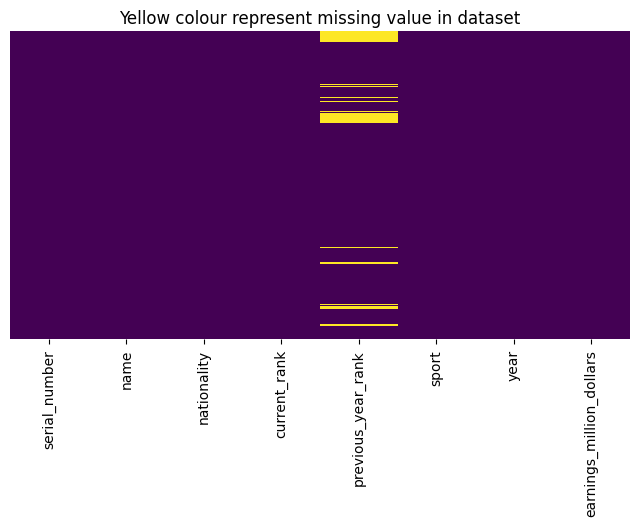

In [21]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Yellow colour represent missing value in dataset")
plt.show()

In [22]:
#Total missing values
df.previous_year_rank.isnull().sum()

34

#### Defining function to calculate Missing Values

In [23]:
def check_missing_values(df):
    print("Missing values in rows:")
    print(df[df.isnull().any(axis=1)])
    print()
    print("Missing values in columns:")
    print(df.isnull().sum())

In [24]:
#Calling function
check_missing_values(df)

Missing values in rows:
     serial_number                name nationality  current_rank  \
0                1          Mike Tyson         USA             1   
1                2      Buster Douglas         USA             2   
2                3   Sugar Ray Leonard         USA             3   
3                4        Ayrton Senna      Brazil             4   
4                5         Alain Prost      France             5   
5                6       Jack Nicklaus         USA             6   
6                7         Greg Norman   Australia             7   
7                8      Michael Jordan         USA             8   
8                9       Arnold Palmer         USA             8   
9               10   Evander Holyfield         USA             8   
51              52          Mike Tyson         USA             2   
53              54        Riddick Bowe         USA             4   
64              65         Emmit Smith         USA             5   
68              69      

#### Now we have, total missing values of 34

In [25]:
#Printing all NaN columns
df[df.isna().any(axis=1)]

,serial_number,name,nationality,current_rank,previous_year_rank,sport,year,earnings_million_dollars
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


#### Indexing and inspecting file

In [26]:
#Printing all missing index
missing_values = df[df.isna().any(axis=1)]
for i, row in enumerate(missing_values.values):
    print(f'Missing value index number {i+1}: {row}')

Missing value index number 1: [1 'Mike Tyson' 'USA' 1 nan 'boxing' 1990 28.6]
Missing value index number 2: [2 'Buster Douglas' 'USA' 2 nan 'boxing' 1990 26.0]
Missing value index number 3: [3 'Sugar Ray Leonard' 'USA' 3 nan 'boxing' 1990 13.0]
Missing value index number 4: [4 'Ayrton Senna' 'Brazil' 4 nan 'auto racing' 1990 10.0]
Missing value index number 5: [5 'Alain Prost' 'France' 5 nan 'auto racing' 1990 9.0]
Missing value index number 6: [6 'Jack Nicklaus' 'USA' 6 nan 'golf' 1990 8.6]
Missing value index number 7: [7 'Greg Norman' 'Australia' 7 nan 'golf' 1990 8.5]
Missing value index number 8: [8 'Michael Jordan' 'USA' 8 nan 'basketball' 1990 8.1]
Missing value index number 9: [9 'Arnold Palmer' 'USA' 8 nan 'golf' 1990 8.1]
Missing value index number 10: [10 'Evander Holyfield' 'USA' 8 nan 'boxing' 1990 8.1]
Missing value index number 11: [52 'Mike Tyson' 'USA' 2 nan 'boxing' 1995 40.0]
Missing value index number 12: [54 'Riddick Bowe' 'USA' 4 nan 'boxing' 1995 22.2]
Missing va

#### Printing List of Name for inspecting missing values

In [27]:
name_misisng = []
for i, row in enumerate(missing_values.values):
    print(f'{i+1} : {row[1]}')
    name_misisng.append({row[1]})

1 : Mike Tyson
2 : Buster Douglas
3 : Sugar Ray Leonard
4 : Ayrton Senna
5 : Alain Prost
6 : Jack Nicklaus
7 : Greg Norman
8 : Michael Jordan
9 : Arnold Palmer
10 : Evander Holyfield
11 : Mike Tyson
12 : Riddick Bowe
13 : Emmit Smith
14 : Dennis Rodman
15 : Joe Sakic
16 : Michael Jordan
17 : Michael Schumacher
18 : Sergei Federov
19 : Tiger Woods
20 : Dale Earnhardt
21 : Grant Hill
22 : Oscar De La Hoya
23 : Patrick Ewing
24 : Arnold Palmer
25 : Gary Sheffield
26 : Floyd Mayweather
27 : Drew Brees
28 : Aaron Rodgers
29 : Andrew Luck
30 : Stephen Curry
31 : James Harden
32 : Lewis Hamilton
33 : Russell Wilson
34 : Aaron Rogers


In [28]:
name_misisng

[{'Mike Tyson'},
 {'Buster Douglas'},
 {'Sugar Ray Leonard'},
 {'Ayrton Senna'},
 {'Alain Prost'},
 {'Jack Nicklaus'},
 {'Greg Norman'},
 {'Michael Jordan'},
 {'Arnold Palmer'},
 {'Evander Holyfield'},
 {'Mike Tyson'},
 {'Riddick Bowe'},
 {'Emmit Smith'},
 {'Dennis Rodman'},
 {'Joe Sakic'},
 {'Michael Jordan'},
 {'Michael Schumacher'},
 {'Sergei Federov'},
 {'Tiger Woods'},
 {'Dale Earnhardt'},
 {'Grant Hill'},
 {'Oscar De La Hoya'},
 {'Patrick Ewing'},
 {'Arnold Palmer'},
 {'Gary Sheffield'},
 {'Floyd Mayweather'},
 {'Drew Brees'},
 {'Aaron Rodgers'},
 {'Andrew Luck'},
 {'Stephen Curry'},
 {'James Harden'},
 {'Lewis Hamilton'},
 {'Russell Wilson'},
 {'Aaron Rogers'}]

In [29]:
name_duplicate = ['Mike Tyson','Buster Douglas','Sugar Ray Leonard','Ayrton Senna','Alain Prost','Jack Nicklaus','Greg Norman','Michael Jordan','Arnold Palmer','Evander Holyfield','Mike Tyson','Riddick Bowe','Emmit Smith','Dennis Rodman','Joe Sakic','Michael Jordan','Michael Schumacher','Sergei Federov','Tiger Woods','Dale Earnhardt','Grant Hill','Oscar De La Hoya','Patrick Ewing','Arnold Palmer','Gary Sheffield','Floyd Mayweather','Drew Brees','Aaron Rodgers','Andrew Luck','Stephen Curry','James Harden','Lewis Hamilton','Russell Wilson','Aaron Rogers']

In [30]:
len(name_misisng)

34

In [31]:
print(name_duplicate)

['Mike Tyson', 'Buster Douglas', 'Sugar Ray Leonard', 'Ayrton Senna', 'Alain Prost', 'Jack Nicklaus', 'Greg Norman', 'Michael Jordan', 'Arnold Palmer', 'Evander Holyfield', 'Mike Tyson', 'Riddick Bowe', 'Emmit Smith', 'Dennis Rodman', 'Joe Sakic', 'Michael Jordan', 'Michael Schumacher', 'Sergei Federov', 'Tiger Woods', 'Dale Earnhardt', 'Grant Hill', 'Oscar De La Hoya', 'Patrick Ewing', 'Arnold Palmer', 'Gary Sheffield', 'Floyd Mayweather', 'Drew Brees', 'Aaron Rodgers', 'Andrew Luck', 'Stephen Curry', 'James Harden', 'Lewis Hamilton', 'Russell Wilson', 'Aaron Rogers']


In [32]:
def remove_duplicate(x):
      return list(dict.fromkeys(x))

mylist = remove_duplicate(name_duplicate)

remove_duplicate(mylist)

['Mike Tyson',
 'Buster Douglas',
 'Sugar Ray Leonard',
 'Ayrton Senna',
 'Alain Prost',
 'Jack Nicklaus',
 'Greg Norman',
 'Michael Jordan',
 'Arnold Palmer',
 'Evander Holyfield',
 'Riddick Bowe',
 'Emmit Smith',
 'Dennis Rodman',
 'Joe Sakic',
 'Michael Schumacher',
 'Sergei Federov',
 'Tiger Woods',
 'Dale Earnhardt',
 'Grant Hill',
 'Oscar De La Hoya',
 'Patrick Ewing',
 'Gary Sheffield',
 'Floyd Mayweather',
 'Drew Brees',
 'Aaron Rodgers',
 'Andrew Luck',
 'Stephen Curry',
 'James Harden',
 'Lewis Hamilton',
 'Russell Wilson',
 'Aaron Rogers']

In [33]:
len(mylist)

31

#### Checking, if we group data, how it look like missing and not missing values

In [34]:
#Grouping missing values
missing_value = df[df.isna().any(axis=1)]
name_missing = []
for i, row in enumerate(missing_values.values):
    name_missing.append(row[1])

group = []
for i in name_missing:
    group.append(df[df['name'] == i])

In [35]:
#Group1
group[0]

,serial_number,name,nationality,current_rank,previous_year_rank,sport,year,earnings_million_dollars
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
11,12,Mike Tyson,USA,2,1,boxing,1991,31.5
51,52,Mike Tyson,USA,2,NaN,boxing,1995,40.0
60,61,Mike Tyson,USA,1,2,Boxing,1996,75.0
74,75,Mike Tyson,USA,5,1,Boxing,1997,27.0
95,96,Mike Tyson,USA,6,10,Boxing,1999,33.0
102,103,Mike Tyson,USA,3,6,Boxing,2000,48.0
116,117,Mike Tyson,USA,7,3,Boxing,2002,23.0


In [36]:
#Last group
group[33]

,serial_number,name,nationality,current_rank,previous_year_rank,sport,year,earnings_million_dollars
287,288,Aaron Rogers,USA,7,NaN,American Football,2019,89.3


In [37]:
# NaN values on previous_year_rank
df.isnull().sum()

serial_number                0
name                         0
nationality                  0
current_rank                 0
previous_year_rank          34
sport                        0
year                         0
earnings_million_dollars     0
dtype: int64

In [38]:
#Lots of data are not accurate in internet to replace NaN individually 
#Removing columns for visualisation
df.drop('previous_year_rank', inplace=True, axis=1)
df.tail(10)

,serial_number,name,nationality,current_rank,sport,year,earnings_million_dollars
291,292,Roger Federer,Switzerland,1,Tennis,2020,106.3
292,293,Cristiano Ronaldo,Portugal,2,Soccer,2020,105.0
293,294,Lionel Messi,Argentina,3,Soccer,2020,104.0
294,295,Neymar,Brazil,4,Soccer,2020,95.5
295,296,LeBron James,USA,5,Basketball,2020,88.2
296,297,Stephen Curry,USA,6,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,American Football,2020,60.5
300,301,Carson Wentz,USA,10,American Football,2020,59.1


In [39]:
df.sport.unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

In [40]:
df.shape

(301, 7)

In [41]:
df['sport'] = df['sport'].replace('boxing', 'Boxing')
df['sport'] = df['sport'].replace('auto racing', 'Auto Racing')
df['sport'] = df['sport'].replace('golf', 'Golf')
df['sport'] = df['sport'].replace('basketball', 'Basketball')
df['sport'] = df['sport'].replace('ice hockey', 'Ice Hockey')
df['sport'] = df['sport'].replace('baseball', 'Baseball')
df['sport'] = df['sport'].replace('motorcycle gp', 'Motorcycle GP')
df['sport'] = df['sport'].replace('soccer', 'Soccer')

In [42]:
df.sport.unique()

array(['Boxing', 'Auto Racing', 'Golf', 'Basketball', 'Tennis', 'NFL',
       'Auto racing', 'NBA', 'Baseball', 'Ice Hockey',
       'American Football / Baseball', 'tennis', 'F1 Motorsports',
       'NASCAR', 'Hockey', 'Auto Racing (Nascar)', 'F1 racing',
       'American Football', 'Soccer', 'cycling', 'Motorcycle GP', 'MMA'],
      dtype=object)

In [43]:
df[df['sport'] == 'American Football / Baseball']

,serial_number,name,nationality,current_rank,sport,year,earnings_million_dollars
52,53,Deion Sanders,USA,3,American Football / Baseball,1995,22.5


In [44]:
df['sport'] = df['sport'].replace('American Football / Baseball', 'American Football')
df[df['sport'] == 'American Football']

,serial_number,name,nationality,current_rank,sport,year,earnings_million_dollars
52,53,Deion Sanders,USA,3,American Football,1995,22.5
133,134,Peyton Manning,USA,3,American Football,2004,42.0
144,145,Michael Vick,USA,4,American Football,2005,37.5
160,161,Tom Brady,USA,9,American Football,2006,29.0
199,200,Eli Manning,USA,9,American Football,2010,39.9
200,201,Terrell Suggs,USA,10,American Football,2010,38.3
220,221,Peyton Manning,USA,10,American Football,2012,42.4
225,226,Drew Brees,USA,5,American Football,2013,51.0
226,227,Aaron Rodgers,USA,6,American Football,2013,49.0
240,241,Matt Ryan,USA,10,American Football,2014,43.8


In [45]:
df[df['sport'] == 'Auto Racing (Nascar)']

,serial_number,name,nationality,current_rank,sport,year,earnings_million_dollars
105,106,Dale Earnhardt,USA,6,Auto Racing (Nascar),2000,24.5
120,121,Jeff Gordon,USA,10,Auto Racing (Nascar),2002,20.0


In [46]:
df[df['sport'] == 'NASCAR']

,serial_number,name,nationality,current_rank,sport,year,earnings_million_dollars
77,78,Dale Earnhardt,USA,8,NASCAR,1997,19.1
84,85,Dale Earnhardt,USA,5,NASCAR,1998,24.1
190,191,Dale Earnhardt Jr.,USA,10,NASCAR,2009,34.0


In [47]:
df['sport'] = df['sport'].replace('Auto Racing (Nascar)', 'NASCAR')

In [48]:
df.sport.unique()

array(['Boxing', 'Auto Racing', 'Golf', 'Basketball', 'Tennis', 'NFL',
       'Auto racing', 'NBA', 'Baseball', 'Ice Hockey',
       'American Football', 'tennis', 'F1 Motorsports', 'NASCAR',
       'Hockey', 'F1 racing', 'Soccer', 'cycling', 'Motorcycle GP', 'MMA'],
      dtype=object)

In [49]:
df[df['sport'] == 'F1 racing']

,serial_number,name,nationality,current_rank,sport,year,earnings_million_dollars
132,133,Michael Schumacher,Germany,2,F1 racing,2004,80.0
142,143,Michael Schumacher,Germany,2,F1 racing,2005,60.0
152,153,Michael Schumacher,Germany,2,F1 racing,2006,58.0
164,165,Kimi Raikkonen,Finland,4,F1 racing,2007,40.0
165,166,Michael Schumacher,Germany,5,F1 racing,2007,36.0
175,176,Kimi Raikkonen,Finland,5,F1 racing,2008,44.0
184,185,Kimi Raikkonen,Finland,2,F1 racing,2009,45.0
209,210,Michael Schumacher,Germany,9,F1 racing,2011,34.0


In [50]:
df[df['sport'] == 'F1 Motorsports']

,serial_number,name,nationality,current_rank,sport,year,earnings_million_dollars
62,63,Michael Schumacher,Germany,3,F1 Motorsports,1996,33.0
73,74,Michael Schumacher,Germany,4,F1 Motorsports,1997,35.0
81,82,Michael Schumacher,Germany,2,F1 Motorsports,1998,38.0
111,112,Michael Schumacher,Germany,2,F1 Motorsports,2002,67.0
122,123,Michael Schumacher,Germany,2,F1 Motorsports,2003,75.0


In [51]:
df['sport'] = df['sport'].replace('F1 racing', 'F1 Motorsports')

In [52]:
df.sport.unique()

array(['Boxing', 'Auto Racing', 'Golf', 'Basketball', 'Tennis', 'NFL',
       'Auto racing', 'NBA', 'Baseball', 'Ice Hockey',
       'American Football', 'tennis', 'F1 Motorsports', 'NASCAR',
       'Hockey', 'Soccer', 'cycling', 'Motorcycle GP', 'MMA'],
      dtype=object)

In [53]:
df.describe()

,serial_number,current_rank,year,earnings_million_dollars
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


In [54]:
#Final check for null values
df.isnull().sum()

serial_number               0
name                        0
nationality                 0
current_rank                0
sport                       0
year                        0
earnings_million_dollars    0
dtype: int64

#### Final check for duplicate in each columns

In [55]:
df.columns

Index(['serial_number', 'name', 'nationality', 'current_rank', 'sport', 'year',
       'earnings_million_dollars'],
      dtype='object')

In [56]:
#Final check for nationality
df.nationality.unique()

array(['USA', 'Brazil', 'France', 'Australia', 'Canada', 'UK', 'Austria',
       'Germany', 'Russia', 'Italy', 'Finland', 'Switzerland',
       'Philippines', 'Portugal', 'Dominican', 'Argentina', 'Filipino',
       'Spain', 'Serbia', 'Northern Ireland', 'Ireland', 'Mexico'],
      dtype=object)

#### There is wrong spelling or duplicate on Nationality Columns

In [57]:
names_count = df.name.unique()
names_count.sort()
names_count

array(['Aaron Rodgers', 'Aaron Rogers', 'Alain Prost', 'Alex Rodriguez',
       'Andre Agassi', 'Andrew Luck', 'Arnold Palmer', 'Ayrton Senna',
       'Buster Douglas', 'Cam Newton', 'Canelo Alvarez', 'Carson Wentz',
       'Cecil Fielder', 'Conor McGregor', 'Cristiano Ronaldo',
       'Dale Earnhardt', 'Dale Earnhardt Jr.', 'David Beckham',
       'Deion Sanders', 'Dennis Rodman', 'Donovan "Razor" Ruddock',
       'Drew Brees', 'Eli Manning', 'Emmit Smith', 'Evander Holyfield',
       'Floyd Mayweather', 'Gary Sheffield', 'George Foreman',
       'Gerhard Berger', 'Grant Hill', 'Greg Norman', 'Jack Nicklaus',
       'Jacques Villeneuve', 'James Harden', 'Jeff Gordon', 'Jim Courier',
       'Joe Montana', 'Joe Sakic', 'Jordan Spieth', 'Kevin Durant',
       'Kevin Garnett', 'Kimi Raikkonen', 'Kirk Cousins', 'Kobe Bryant',
       'Lance Armstrong', 'LeBron James', 'Lennox Lewis',
       'Lewis Hamilton', 'Lionel Messi', 'Manny Pacquiao', 'Matt Ryan',
       'Matthew Stafford', 'Michael 

In [58]:
for i, row in enumerate(names_count):
    print(f'{i+1} : {row}')

1 : Aaron Rodgers
2 : Aaron Rogers
3 : Alain Prost
4 : Alex Rodriguez
5 : Andre Agassi
6 : Andrew Luck
7 : Arnold Palmer
8 : Ayrton Senna
9 : Buster Douglas
10 : Cam Newton
11 : Canelo Alvarez
12 : Carson Wentz
13 : Cecil Fielder
14 : Conor McGregor
15 : Cristiano Ronaldo
16 : Dale Earnhardt
17 : Dale Earnhardt Jr.
18 : David Beckham
19 : Deion Sanders
20 : Dennis Rodman
21 : Donovan "Razor" Ruddock
22 : Drew Brees
23 : Eli Manning
24 : Emmit Smith
25 : Evander Holyfield
26 : Floyd Mayweather
27 : Gary Sheffield
28 : George Foreman
29 : Gerhard Berger
30 : Grant Hill
31 : Greg Norman
32 : Jack Nicklaus
33 : Jacques Villeneuve
34 : James Harden
35 : Jeff Gordon
36 : Jim Courier
37 : Joe Montana
38 : Joe Sakic
39 : Jordan Spieth
40 : Kevin Durant
41 : Kevin Garnett
42 : Kimi Raikkonen
43 : Kirk Cousins
44 : Kobe Bryant
45 : Lance Armstrong
46 : LeBron James
47 : Lennox Lewis
48 : Lewis Hamilton
49 : Lionel Messi
50 : Manny Pacquiao
51 : Matt Ryan
52 : Matthew Stafford
53 : Michael Jordan

In [59]:
df[df['name'] == 'Aaron Rogers']

,serial_number,name,nationality,current_rank,sport,year,earnings_million_dollars
287,288,Aaron Rogers,USA,7,American Football,2019,89.3


In [60]:
df['name'] = df['name'].replace('Aaron Rogers', "Aaron Rodgers")

In [61]:
df['name'] = df['name'].replace('Dale Earnhard', "Dale Earnhardt Jr.")

In [62]:
df['name'] = df['name'].replace('Shaq O\'Neal', "Shaquille O'Neal")

In [63]:
names_count = df.name.unique()
names_count.sort()
names_count

array(['Aaron Rodgers', 'Alain Prost', 'Alex Rodriguez', 'Andre Agassi',
       'Andrew Luck', 'Arnold Palmer', 'Ayrton Senna', 'Buster Douglas',
       'Cam Newton', 'Canelo Alvarez', 'Carson Wentz', 'Cecil Fielder',
       'Conor McGregor', 'Cristiano Ronaldo', 'Dale Earnhardt',
       'Dale Earnhardt Jr.', 'David Beckham', 'Deion Sanders',
       'Dennis Rodman', 'Donovan "Razor" Ruddock', 'Drew Brees',
       'Eli Manning', 'Emmit Smith', 'Evander Holyfield',
       'Floyd Mayweather', 'Gary Sheffield', 'George Foreman',
       'Gerhard Berger', 'Grant Hill', 'Greg Norman', 'Jack Nicklaus',
       'Jacques Villeneuve', 'James Harden', 'Jeff Gordon', 'Jim Courier',
       'Joe Montana', 'Joe Sakic', 'Jordan Spieth', 'Kevin Durant',
       'Kevin Garnett', 'Kimi Raikkonen', 'Kirk Cousins', 'Kobe Bryant',
       'Lance Armstrong', 'LeBron James', 'Lennox Lewis',
       'Lewis Hamilton', 'Lionel Messi', 'Manny Pacquiao', 'Matt Ryan',
       'Matthew Stafford', 'Michael Jordan', 'Michae

#### Analysis Data again and checking if there is any duplicates 

In [64]:
for i, row in enumerate(names_count):
    print(f'{i+1} : {row}')

1 : Aaron Rodgers
2 : Alain Prost
3 : Alex Rodriguez
4 : Andre Agassi
5 : Andrew Luck
6 : Arnold Palmer
7 : Ayrton Senna
8 : Buster Douglas
9 : Cam Newton
10 : Canelo Alvarez
11 : Carson Wentz
12 : Cecil Fielder
13 : Conor McGregor
14 : Cristiano Ronaldo
15 : Dale Earnhardt
16 : Dale Earnhardt Jr.
17 : David Beckham
18 : Deion Sanders
19 : Dennis Rodman
20 : Donovan "Razor" Ruddock
21 : Drew Brees
22 : Eli Manning
23 : Emmit Smith
24 : Evander Holyfield
25 : Floyd Mayweather
26 : Gary Sheffield
27 : George Foreman
28 : Gerhard Berger
29 : Grant Hill
30 : Greg Norman
31 : Jack Nicklaus
32 : Jacques Villeneuve
33 : James Harden
34 : Jeff Gordon
35 : Jim Courier
36 : Joe Montana
37 : Joe Sakic
38 : Jordan Spieth
39 : Kevin Durant
40 : Kevin Garnett
41 : Kimi Raikkonen
42 : Kirk Cousins
43 : Kobe Bryant
44 : Lance Armstrong
45 : LeBron James
46 : Lennox Lewis
47 : Lewis Hamilton
48 : Lionel Messi
49 : Manny Pacquiao
50 : Matt Ryan
51 : Matthew Stafford
52 : Michael Jordan
53 : Michael Moor

In [65]:
duplicates = []
name_count = df.name.value_counts()
for name in name_count.index:
    if name_count[name] > 1:
        duplicates.append(name)
if duplicates:
    print(set(duplicates))
else:
    print("No duplicate names found.")

{'Oscar De La Hoya', 'Valentino Rossi', 'LeBron James', 'Matt Ryan', 'Nigel Mansell', 'Lionel Messi', 'Wayne Gretzky', 'Andre Agassi', 'Arnold Palmer', 'Riddick Bowe', 'Manny Pacquiao', 'Dale Earnhardt', 'Kevin Garnett', 'Peyton Manning', 'Kevin Durant', 'Roger Federer', 'Ayrton Senna', 'Sugar Ray Leonard', 'Jacques Villeneuve', "Shaquille O'Neal", 'Stephen Curry', 'Phil Mickelson', 'Grant Hill', 'Tiger Woods', 'Alain Prost', 'Aaron Rodgers', 'Evander Holyfield', 'Mike Tyson', 'Floyd Mayweather', 'Kimi Raikkonen', 'Lennox Lewis', 'Ronaldinho', 'Jack Nicklaus', 'Patrick Ewing', 'Michael Schumacher', 'Jim Courier', 'Joe Montana', 'David Beckham', 'Neymar', 'Kobe Bryant', 'Alex Rodriguez', 'Cristiano Ronaldo', 'Michael Jordan', 'George Foreman'}


In [66]:
df.columns

Index(['serial_number', 'name', 'nationality', 'current_rank', 'sport', 'year',
       'earnings_million_dollars'],
      dtype='object')

#### Checking duplicates and unique values on nationality columns

In [67]:
df['nationality'].unique()

array(['USA', 'Brazil', 'France', 'Australia', 'Canada', 'UK', 'Austria',
       'Germany', 'Russia', 'Italy', 'Finland', 'Switzerland',
       'Philippines', 'Portugal', 'Dominican', 'Argentina', 'Filipino',
       'Spain', 'Serbia', 'Northern Ireland', 'Ireland', 'Mexico'],
      dtype=object)

#### Checking Duplicates and Unique values

In [68]:
df.year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [69]:
df.earnings_million_dollars.unique()

array([ 28.6,  26. ,  13. ,  10. ,   9. ,   8.6,   8.5,   8.1,  60.5,
        31.5,  16. ,  14.5,  11. ,  10.2,   9.3,  35.9,  28. ,  22. ,
        11.1,   9.5,   9.2,  36. ,  25. ,  18.5,  15.8,  15.2,  15. ,
        12.7,  12.6,  11.5,  30. ,  16.7,  14.8,  13.6,  13.5,  12.1,
        12. ,  11.4,  11.3,  43.9,  40. ,  22.5,  22.2,  21.9,  18. ,
        15.1,  75. ,  52.6,  33. ,  24.4,  16.5,  15.5,  12.9,  78.3,
        54.3,  38. ,  35. ,  27. ,  26.1,  25.4,  19.1,  17.9,  17. ,
        69. ,  29.8,  26.8,  24.1,  21.6,  18.3,  18.1,  17.2,  49. ,
        47. ,  43.5,  35.5,  31. ,  29. ,  26.5,  23. ,  59. ,  53. ,
        48. ,  37. ,  24.5,  24. ,  21. ,  67. ,  20. ,  78. ,  30.5,
        25.5,  80.3,  80. ,  42. ,  31.9,  29.7,  28.2,  26.2,  87. ,
        60. ,  37.5,  33.4,  32.5,  28.8,  90. ,  58. ,  55. ,  32. ,
       100. ,  43. , 115. ,  50. ,  45. ,  44. ,  39. , 110. ,  34. ,
       105. ,  65. ,  46. ,  43.7,  42.8,  39.9,  38.3,  46.5,  32.3,
        85. ,  62. ,

## Data Visualisation 

### 1. Most Earning sports

In [70]:
# Group the DataFrame by the "sport" column and calculate the sum of "earnings_million_dollars"
grouped_df = df.groupby("sport")["earnings_million_dollars"].sum()

# Print the result
grouped_df

sport
American Football     923.7
Auto Racing           367.8
Auto racing            18.5
Baseball              146.1
Basketball           3418.1
Boxing               2298.8
F1 Motorsports        645.0
Golf                 2136.5
Hockey                 17.9
Ice Hockey             57.8
MMA                    99.0
Motorcycle GP         128.0
NASCAR                121.7
NBA                    15.2
NFL                    37.5
Soccer               2223.5
Tennis                848.1
cycling                28.0
tennis                169.2
Name: earnings_million_dollars, dtype: float64

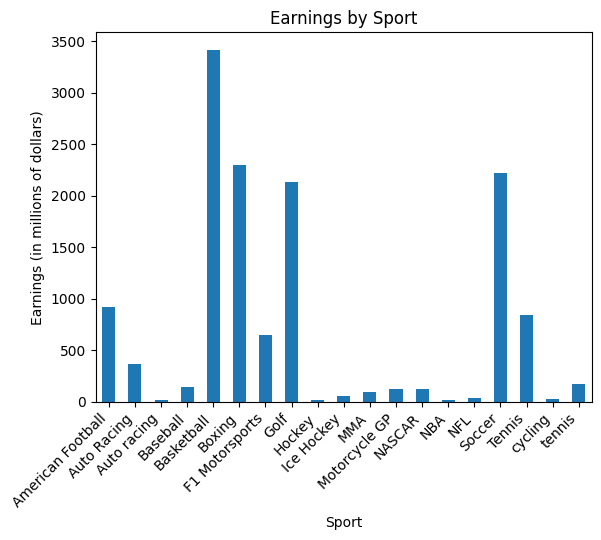

In [71]:
# Plot the grouped DataFrame as a bar graph
grouped_df.plot(kind='bar')

# Add a title and labels to the graph
plt.xticks(rotation=45, ha='right')
plt.title("Earnings by Sport")
plt.xlabel("Sport")
plt.ylabel("Earnings (in millions of dollars)")

# Show the graph
plt.show()


1. Top first most sum of all earning sport is basketball 
2. second most sum of all earning sport is soccer
3. Third most sum of all earning sport is boxing 
4. Fourth most sum of all earning sport is golf
4. least most earning sport is ice hockey

### 2. Top 10 Earning players

In [72]:
# Sort the DataFrame by the "earnings_million_dollars" column in descending order
df = df.sort_values("earnings_million_dollars", ascending=False)

# Get the top earner
top_earner = df.head(24)

In [73]:
top_earner.name.unique()

array(['Floyd Mayweather', 'Manny Pacquiao', 'Lionel Messi',
       'Tiger Woods', 'Cristiano Ronaldo', 'Roger Federer', 'Neymar',
       'Conor McGregor', 'Canelo Alvarez', 'Russell Wilson'], dtype=object)

In [74]:
for i, row in enumerate(top_earner.name.unique()):
    print(f'{i+1} : {row}')

1 : Floyd Mayweather
2 : Manny Pacquiao
3 : Lionel Messi
4 : Tiger Woods
5 : Cristiano Ronaldo
6 : Roger Federer
7 : Neymar
8 : Conor McGregor
9 : Canelo Alvarez
10 : Russell Wilson


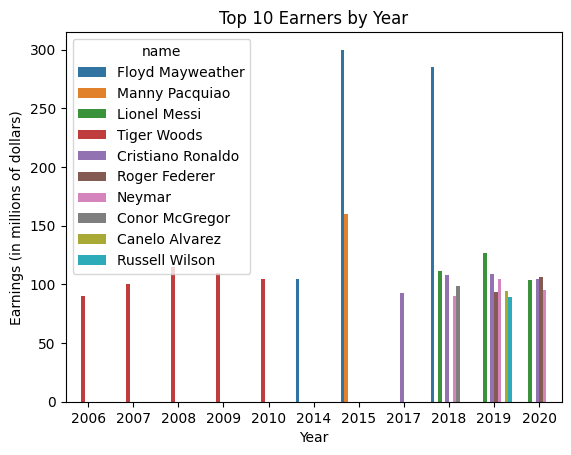

In [75]:
sns.barplot(x = 'year', y = 'earnings_million_dollars', hue = 'name', data = top_earner, estimator=sum, ci=None)
plt.title("Top 10 Earners by Year")
plt.xlabel("Year")
plt.ylabel("Earnings (in millions of dollars)")
plt.show()

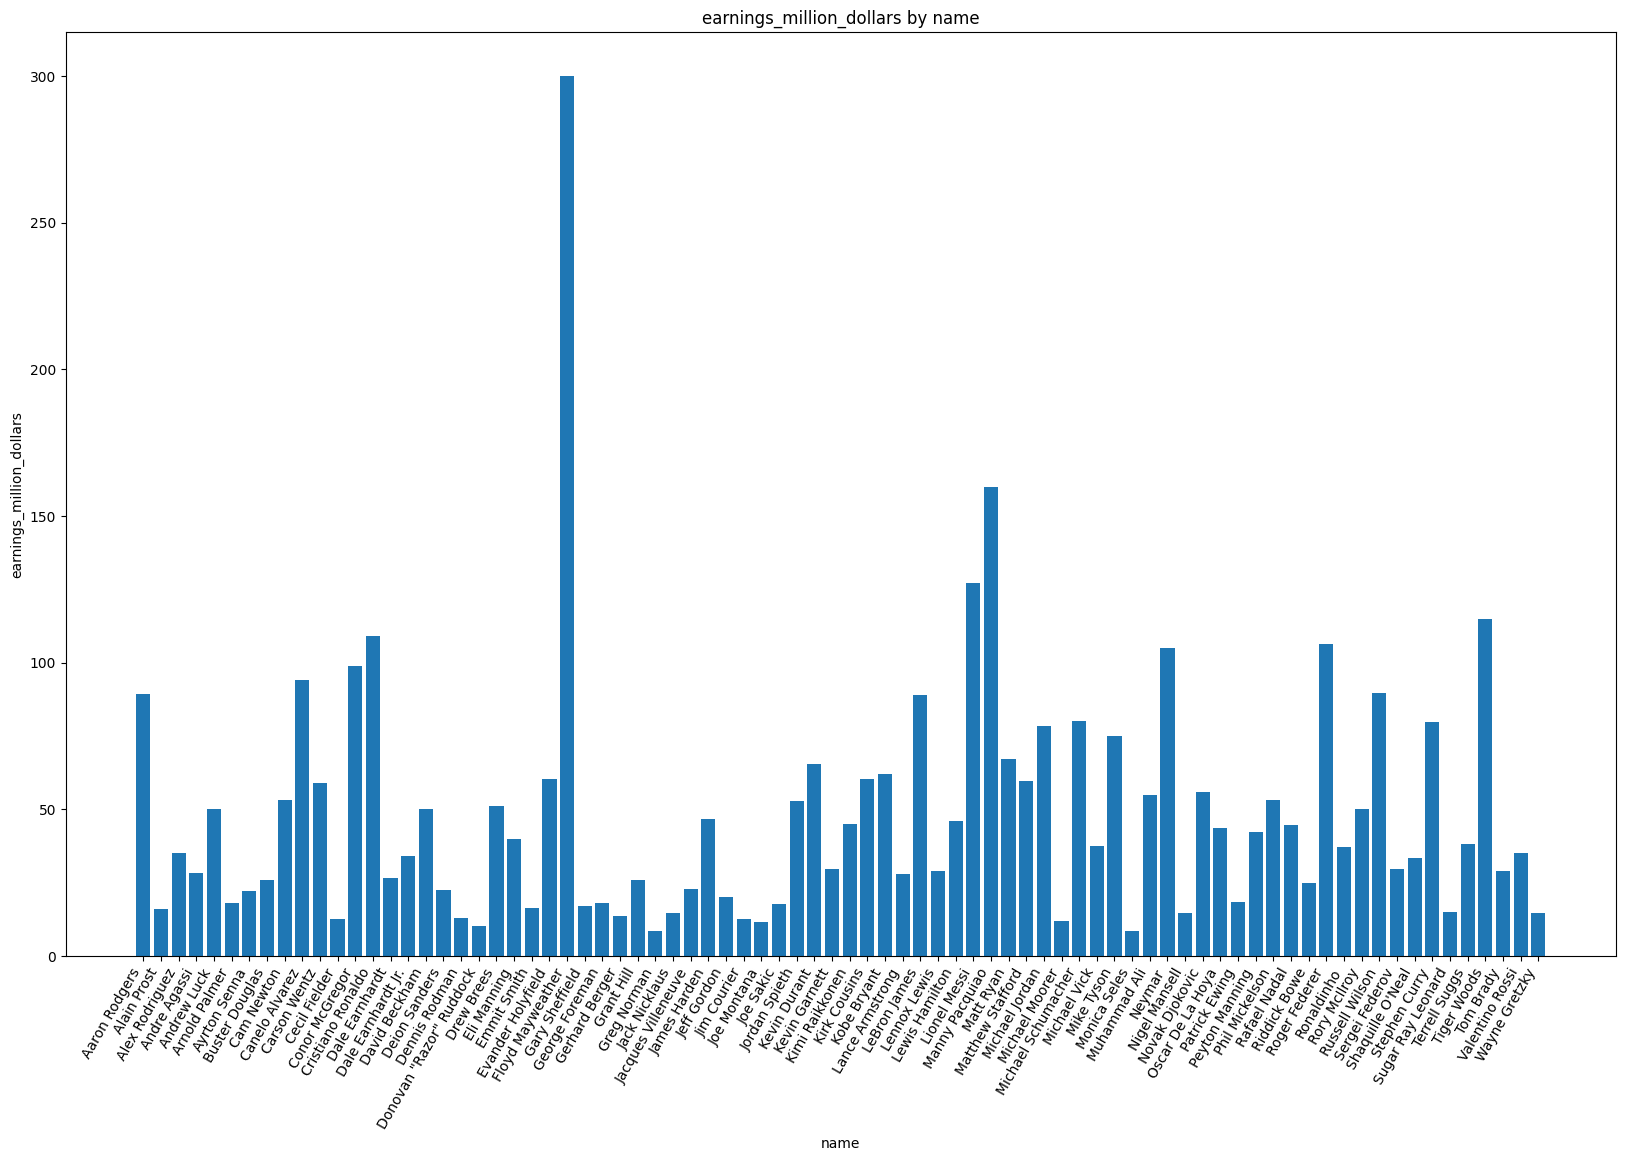

In [76]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
    df = df.to_frame(index=False)

    df = df.reset_index().drop('index', axis=1, errors='ignore')
    df.columns = [str(c) for c in df.columns]

chart_data = pd.concat([
df['name'],
df['earnings_million_dollars'],
], axis=1)
chart_data = chart_data.sort_values(['name'])
chart_data = chart_data.rename(columns={'name': 'x'})
chart_data = chart_data.dropna()

plt.figure(figsize=(20,12))
plt.xticks(rotation=60, ha='right')
plt.bar(chart_data['x'], chart_data['earnings_million_dollars'])
plt.xlabel('name')
plt.ylabel('earnings_million_dollars')
plt.title('earnings_million_dollars by name')
plt.show()

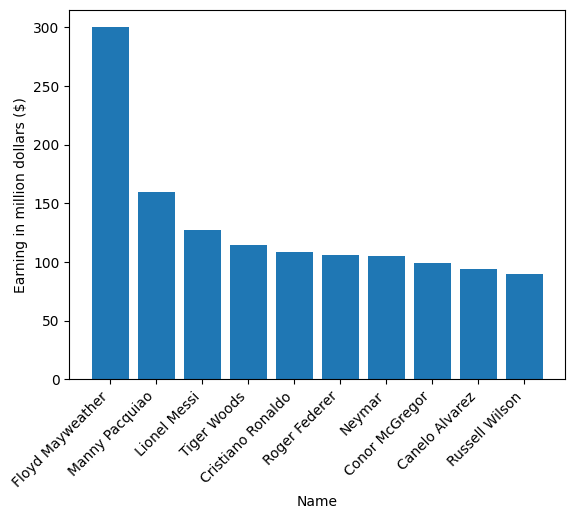

In [77]:
plt.bar(top_earner.name, top_earner.earnings_million_dollars)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Earning in million dollars ($)")
plt.xlabel("Name")
plt.show()

#### Top 10 Earning palyers are:

1. Floyd Mayweather is the first top earning player
2. Manny Pacquiao is the second top earning player
3. Lionel Messi is the third top earning player
4. Tiger woods is the fourth top earning  player
5. Christiano Ronaldo is the fifth top earning player
6. Roger Federer is the sixth top earning player
7. Neymar Jr is the seventh top earning player
8. Conor McGregor is the eight top earning player
9. Canelo Alvarez is the ninth top earning  player
10. Russell wilson is the tenth top earning player

### 3. Athletes listed in Forbes by country (1990-2020)

In [78]:
count_by_nationality=df.nationality.value_counts().to_frame()
count_by_nationality

,nationality
USA,206
Germany,13
UK,13
Switzerland,12
Portugal,10
Argentina,9
Brazil,9
Canada,6
Italy,4
France,3


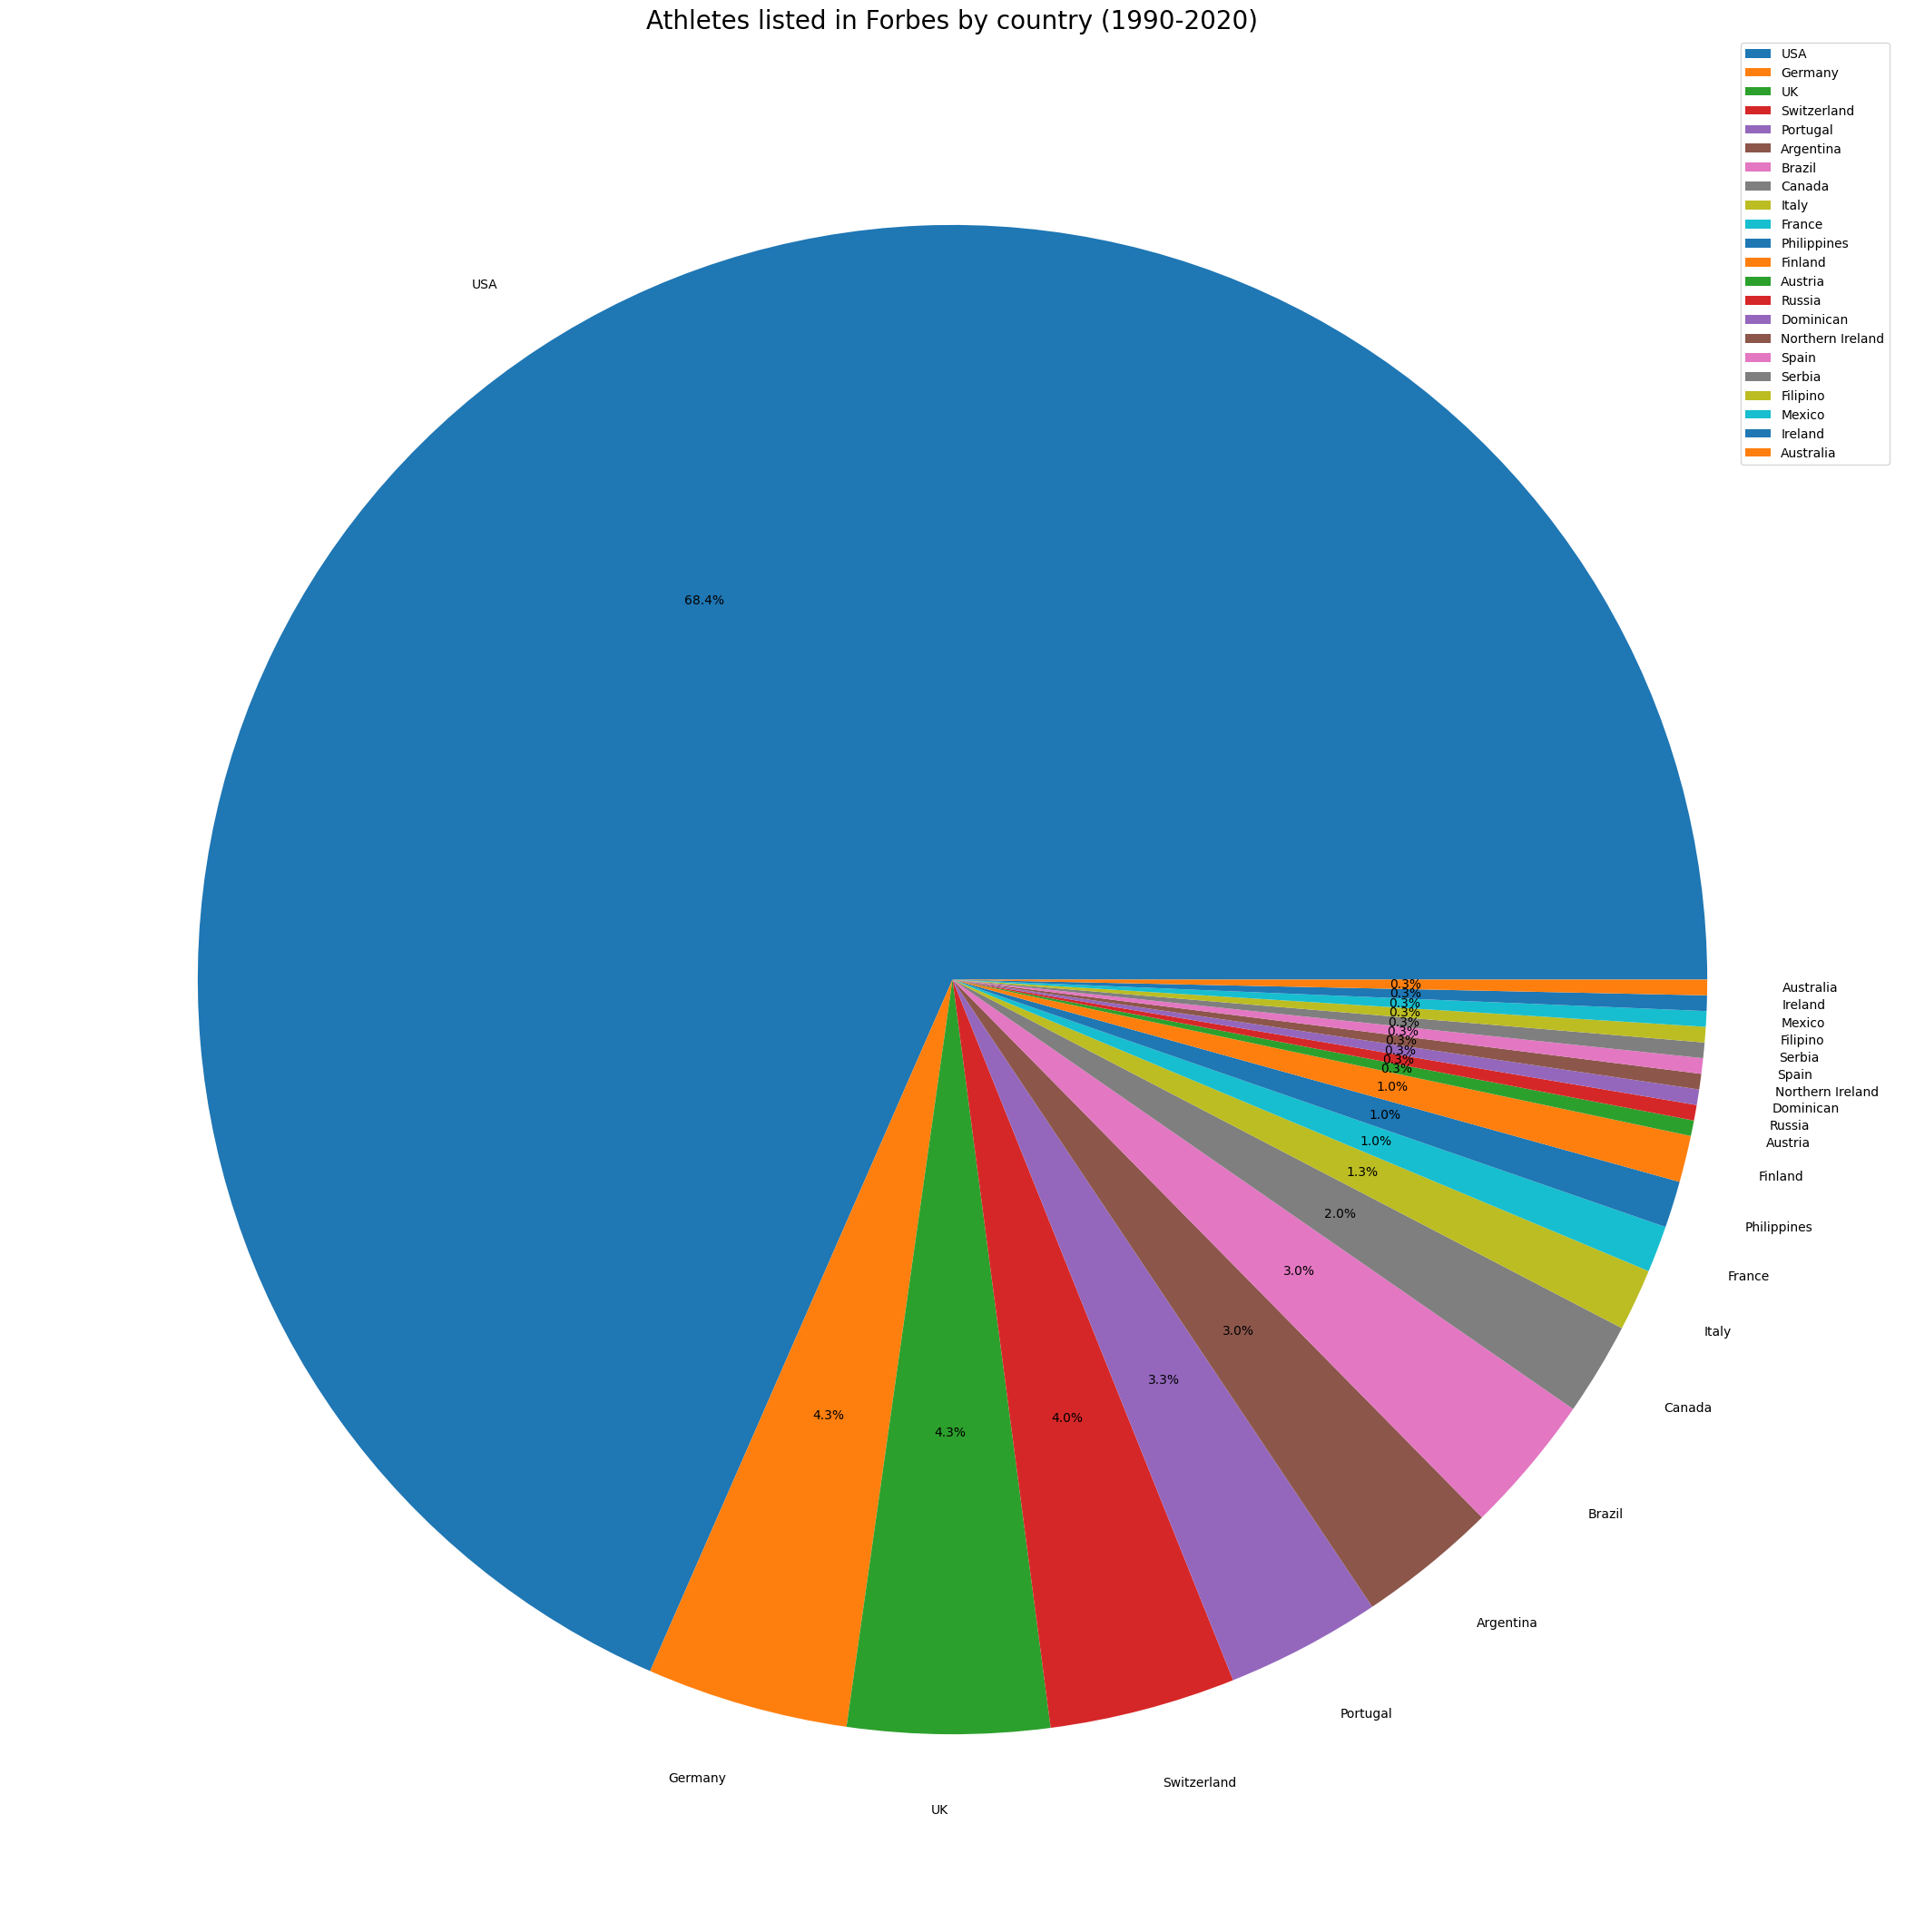

In [79]:
plt.figure(figsize=(30,27))
plt.pie(count_by_nationality.values.flatten(),
        labels=count_by_nationality.index.tolist(),
        autopct='%.1f%%')
plt.title('Athletes listed in Forbes by country (1990-2020)',fontsize=20)
plt.legend(count_by_nationality.index)
plt.show()

### 4. Number of Athletes according to sport

In [80]:
number_of_athletes=df.sport.str.lower().value_counts().to_frame()
number_of_athletes

,sport
basketball,81
boxing,46
golf,44
soccer,33
tennis,23
auto racing,18
american football,18
f1 motorsports,13
baseball,6
nascar,5


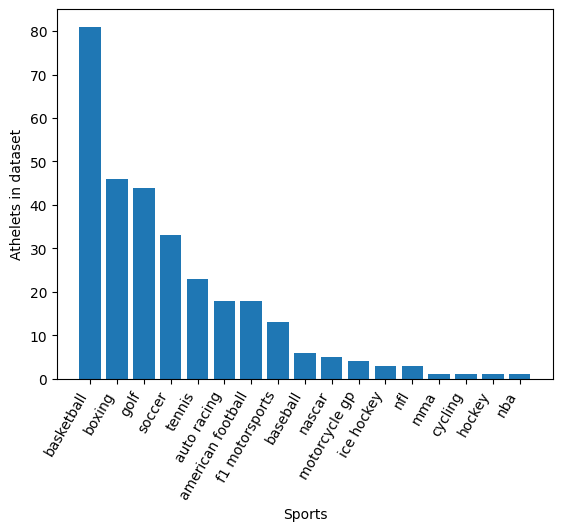

In [81]:
plt.bar(number_of_athletes.index, number_of_athletes.sport)
plt.xticks(rotation=60, ha='right')
plt.ylabel("Athelets in dataset")
plt.xlabel("Sports")
plt.show()

1. Highest number of playes are in basketball
2. Lowest number of playes are in NBA

### 4. Most Forbe listed Athletes

In [82]:
temp_df=df.copy()
temp_df.set_index('name',inplace=True)
temp_df[:5]

,serial_number,nationality,current_rank,sport,year,earnings_million_dollars
name,,,,,,
Floyd Mayweather,242,USA,1,Boxing,2015,300.0
Floyd Mayweather,272,USA,1,Boxing,2018,285.0
Manny Pacquiao,243,Philippines,2,Boxing,2015,160.0
Lionel Messi,282,Argentina,1,Soccer,2019,127.0
Tiger Woods,172,USA,1,Golf,2008,115.0


In [83]:
listed_athletes=df.name.mode().tolist()
listed_athletes

['Michael Jordan', 'Tiger Woods']

In [84]:
count_athelets = temp_df.loc[listed_athletes][['nationality','sport','year']]
count_athelets

,nationality,sport,year
name,,,
Michael Jordan,USA,Basketball,1997
Michael Jordan,USA,Basketball,1998
Michael Jordan,USA,Basketball,1996
Michael Jordan,USA,Basketball,2008
Michael Jordan,USA,Basketball,2009
Michael Jordan,USA,Basketball,1995
Michael Jordan,USA,Basketball,1999
Michael Jordan,USA,Basketball,2000
Michael Jordan,USA,Basketball,2002


1. Micheal Jordan has appeared in forbes 19 times
2. Tiger Woods has appeared in forbes 19 times 

### 5. Mean earning

In [85]:
df_temp2=df.groupby(df.sport.str.lower())[['earnings_million_dollars']].mean()

In [86]:
df_temp2

,earnings_million_dollars
sport,
american football,51.316667
auto racing,21.461111
baseball,24.350000
basketball,42.198765
boxing,49.973913
cycling,28.000000
f1 motorsports,49.615385
golf,48.556818
hockey,17.900000


In [87]:
df_temp2.max()

earnings_million_dollars    99.0
dtype: float64

In [88]:
df_temp2.min()

earnings_million_dollars    12.5
dtype: float64

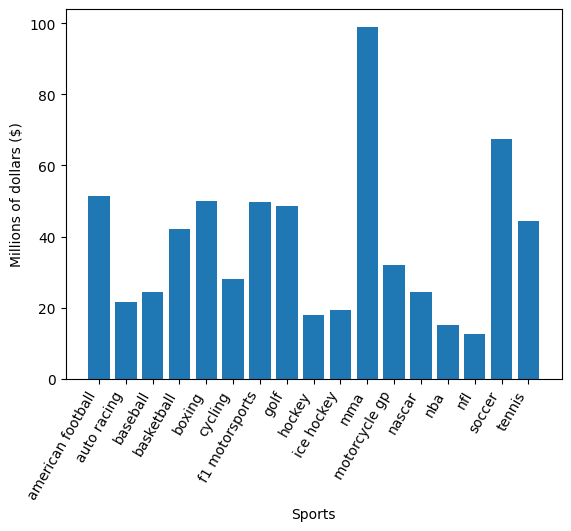

In [89]:
plt.bar(df_temp2.index, df_temp2['earnings_million_dollars'])
plt.xticks(rotation=60, ha='right')
plt.ylabel("Millions of dollars ($)")
plt.xlabel("Sports")
plt.show()

1. Maximum average earning is 99 million dollars, which is MMA
2. Minimum average earning is 12.5 million dollars, which is NFL